In [1]:
using JLD,PyPlot


In [2]:
include("../CenterOfMass/TrayectoriasAux.jl")

distprom (generic function with 1 method)

In [3]:
nome="../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2-Tray.jld"
nomecsd="../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2.jld"

"../JLDFiles/TrabajandoCentrosdeMasa/140116s2cut2_evento_2.jld"

In [4]:
datostray=load(nome)
datoscsd=load(nomecsd)

Dict{String,Any} with 8 entries:
  "Canalesrespuesta" => Set(Array{Int64,1}[[27, 62], [36, 44], [37, 62], [48, 5…
  "KTilde"           => [0.922806 0.553188 … 0.0186325 0.0184857; 0.553188 0.92…
  "LFPTotal"         => [-4122.99 24.1699 … 24.1699 -26.1841; -16.1133 -22.1558…
  "CSDLindenberg"    => [-2.83702 28.2598 … 6.59675 -13.8075; -10.37 -4.86814 ……
  "Nota"             => "Usamos las siguientes B y BT para obtener las Ks: Bcer…
  "K"                => [30.3419 15.5553 … 6.37984 6.25525; 15.5553 32.6147 … 6…
  "freq"             => 7.02206
  "CanalesSaturados" => Set(Array{Int64,1}[[47, 54], [39, 45], [54, 4], [1, 1],…

In [5]:
cmp=datostray["CatenarioPositivo"];
cmn=datostray["CatenarioNegativo"];
csd=datoscsd["CSDLindenberg"];
retraso=0
freq=datoscsd["freq"]

7.022058198545425

In [6]:
typeof(cmp)

Dict{Integer,Array{Any,N} where N}

In [7]:
cmpred=reducecadetenario(cmp,25,3,300,0.5);
cmnegred=reducecadetenario(cmn,25,3,300,0.5);

In [8]:
(length(cmpred), length(cmnegred))

(417, 241)

In [ ]:
 escribevelo=false 

PyPlot.ion()
        cuadro=1230
        retrazo=1000
        ImagenCSD=csd[:,:,cuadro];
        figure(figsize=(6,6))  
        milisec=round((cuadro-retrazo)/freq,1)
        title("t= $milisec ms")
        tick_params(labelbottom="on", labelleft="on", direction="out")
        xticks(fontsize=10)
        yticks(fontsize=10)
        xlim(0,65)
        ylim(0,65)
        
        limcsd=75
        bolitasrojas=0
        bolitasazules=0
        tight_layout()
    
        guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="bicubic", 
        vmin=-limcsd, vmax=limcsd, extent=[1,65,1,65], origin="lower")
 

    
            for (k,p) in cmpred
                paux=p
                paux=p
                cucho,fleto=size(paux)
                 longus,falsus=size(p)

                if cucho>0
        #Si son chiquitos no nos interesan.
                    xxpos=paux[:,1]
                    yypos=paux[:,2]
                    gordis=abs.(map(Float32, paux[:,3]))
                    tiempos=round.(paux[:,4]/7.022,1)   
                    
                    plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=1,zorder=1900)
                    scatter(xxpos[end],yypos[end],marker="o",s=0.06*gordis, color="red",alpha=0.3)
            
           
                    inicios=scatter(xxpos[1],yypos[1], s=20, edgecolors="black", 
                                linewidth=1,
                                facecolor="maroon", marker="o",zorder=1999 )
        
                
                        finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="orange", 
                        linewidth=1,facecolor="crimson", marker="^", label="Final",zorder=2000 )
                
                    #     annotate(round(tiempos[1],1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
    
                    if escribevelo && (length(tiempos)>1)
                            dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                            vel=round(dist*freq,1)
                            annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="maroon", zorder=1950)
                    end
    
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
                    end #(cierra sobre cucho)

                end #cierra sobre cmpred


        for (k,p) in cmnegred
            paux=p
            paux=p
            cucho,fleto=size(paux)
            longus,falsus=size(p)
            if  cucho>0
                #Si son chiquitos no nos interesan.
                xxpos=paux[:,1]
                yypos=paux[:,2]    
                gordis=abs.(map(Float32, paux[:,3]))
                tiempos= round.((paux[:,4]-retraso)/7.022,1)   
                plot(xxpos, yypos, marker="o", markersize=1, color="cyan", lw=1,zorder=1998)   
                    scatter(xxpos[end],yypos[end],marker="o", s=0.06*gordis, color="blue",alpha=0.3)
                inicios=scatter(xxpos[1],yypos[1], s=15, edgecolors="black", 
                linewidth=1,
                facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )        
            
                        finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="cyan", 
                    linewidth=1,
                    facecolor="midnightblue", marker="^", label="Final",zorder=2000 )
    
            
            if(escribevelo) && (length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
             end
                end #sobre cucho
            end #sobre cmnegred
        
  
   
 savefig("CSDyTray-TodoJunto02.svg",dpi=90)    
      
   

In [26]:

function ploteaanimacioncompleta(inicio=1000, fin=1500, traypos=false, trayneg=false, escribevelo=false)

    retrazo=inicio
    tiemposinteresantes=inicio:fin
    
    epsi=11
    vepsi=(-epsi,epsi)
    cepsi=("teal","tomato")
    distie=42 #Distancia inter electrodo
    
    for cuadro in tiemposinteresantes
        PyPlot.ioff()
        
        ImagenCSD=csd[:,:,cuadro];
        figure(figsize=(3,3))
        axis("equal")
        milisec=round((cuadro-retrazo)/freq,1)
        title("t= $milisec ms")
        tick_params(labelbottom="on", labelleft="on", direction="out")
        xticks(fontsize=10)
        yticks(fontsize=10)
        xlim(0,65)
        ylim(0,65)
        limcsd=300
        bolitasrojas=0
        bolitasazules=0
        tight_layout()
    
        guacafondo=imshow(ImagenCSD, cmap="bwr", interpolation="bicubic", 
        vmin=-limcsd, vmax=limcsd, extent=[1.5,64.5,63.5,1.5])
        contour(csd[:,:,cuadro], vepsi, colors=cepsi, lw=0.4)
        
        if traypos
            
            for (k,p) in cmpred
                paux=AntesQue(p,cuadro+1)
                paux=DespuesQue(paux,retrazo)
                cucho,fleto=size(paux)
                 longus,falsus=size(p)

                if cucho>0  && (p[end,4] >= cuadro+6) ## que se dibujen hasta final pero que persistan un poco
        #Si son chiquitos no nos interesan.
                    xxpos=paux[:,1]
                    yypos=paux[:,2]
                    gordis=abs.(map(Float32, paux[:,3]))
                    tiempos=round.(paux[:,4]/7.022,1)   
                    
                    plot(xxpos, yypos, marker="o", markersize=1, color="maroon", lw=0.75,zorder=1800)
                    
                    #=
                    scatter(xxpos[end],yypos[end],marker="o",s=0.06*gordis, color="red",alpha=0.3)
                    inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
                                linewidth=1,
                                facecolor="maroon", marker="o",zorder=1999 )
                    =#
                finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="red", marker="o", label="Final" ,zorder=1200)
                    #     annotate(round(tiempos[1],1),  (xxpos[1], yypos[1]), fontsize=7, color="black")
    
                    if escribevelo && (length(tiempos)>1)
                            dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                            vel=round(dist*freq*distie,1)
                            annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="maroon", zorder=1950)
                    end
    
      #      scatter(xxpos[end],yypos[end], s=gordis[end]*0.5, alpha=0.5, 
       #     c="darkorange", edgecolors="none")
                    end #(cierra sobre cucho)

                end #cierra sobre cmpred
            end #cierra sobre if pos

      if trayneg
        for (k,p) in cmnegred 
            paux=AntesQue(p,cuadro+1)
            paux=DespuesQue(paux,retrazo)
            cucho,fleto=size(paux)
            longus,falsus=size(p)
                if  cucho>0  && (p[end,4] >= cuadro+6) #persistencia por un ratito
                #Si son chiquitos no nos interesan.
                xxpos=paux[:,1]
                yypos=paux[:,2]    
                gordis=abs.(map(Float32, paux[:,3]))
                tiempos= round.((paux[:,4]-retraso)/7.022,1)   
                plot(xxpos, yypos, marker="o", markersize=1, color="darkblue", lw=0.75,zorder=1798)   
               
                #=    
                scatter(xxpos[end],yypos[end],marker="o", s=0.06*gordis, color="blue",alpha=0.3)
                    inicios=scatter(xxpos[1],yypos[1], s=10, edgecolors="black", 
                linewidth=1,
                facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )        
                =#   
                    
                finales=scatter(xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="darkblue", marker="o", label="Final" ,zorder=1200)
                    
                    
            if(escribevelo) && (length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq*distie,1)
                        annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="darkblue", zorder=1950)
             end
                end #sobre cucho
            end #sobre cmnegred
        end #sobre trayneg
  
        savefig("CSDyTray-novelo-$cuadro.png",dpi=90)    
     #   savefig("CSDyTray-$cuadro.svg",dpi=90)    
        PyPlot.close_figs()        
    end #sobre tiempos interesantes
    println("listo") 
end  #sobre function

ploteaanimacioncompleta (generic function with 6 methods)

In [27]:
ploteaanimacioncompleta(1084,1500, true, true, false)

listo


 Vamos a hacer una latíz de graficas siguiendo las directivas del RGut.

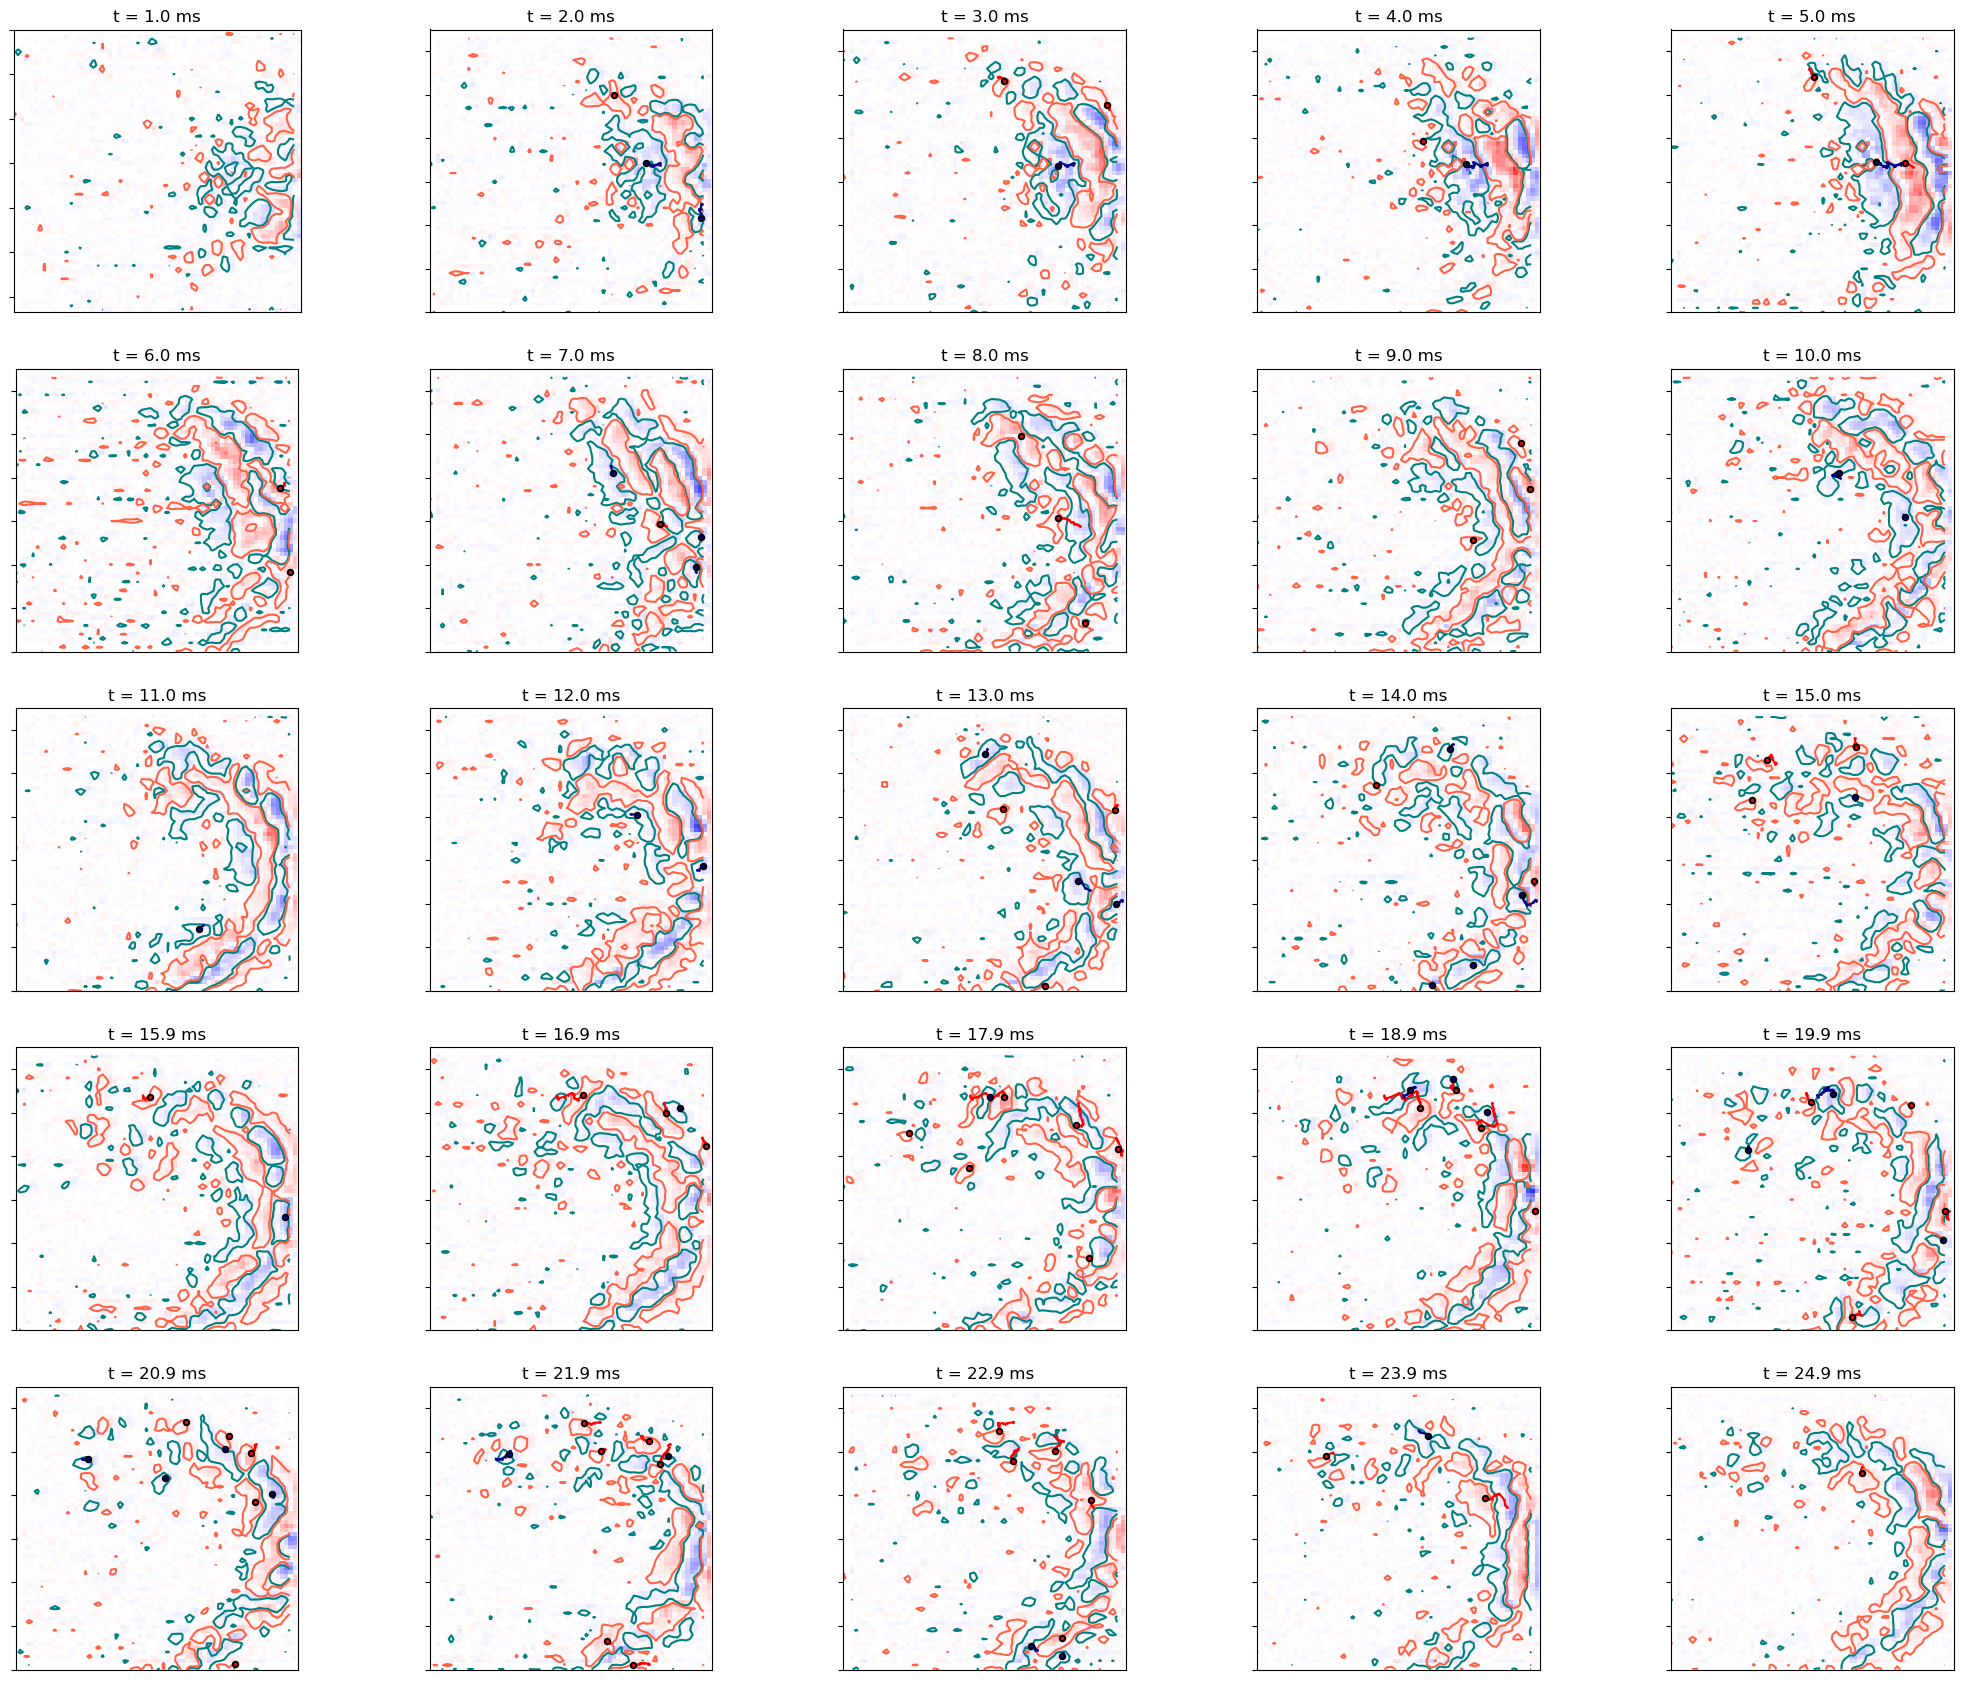

821.690089 seconds (2.33 M allocations: 110.907 MiB, 0.00% gc time)


In [8]:
ion()
farofa, lista=subplots(5,5, figsize=(25,20))
limcsd=400
inicio=1084
fin=1500
retrazo=inicio

epsi=9
vepsi=(-epsi,epsi)
cepsi=("teal","tomato")

@time for j=1:25
    pu=ceil(Int,j/5)
    pa=mod(j,5)
    #reallambda=(1+intervalo*j/rangolambda)
    if pa==0; pa=5;end
    cuadro=inicio+j*7
    milisec=round((cuadro-retrazo)/freq,1)
    
    subplots_adjust(bottom=0.06,left=0.1)
    
    lista[pu,pa][:imshow](csd[:,:,cuadro],cmap="seismic",vmin=-limcsd,vmax=limcsd,
        interpolation="nearest",extent=[1.5,64.5,63.5,1.5])
    lista[pu,pa][:contour](csd[:,:,cuadro], vepsi, colors=cepsi, lw=0.75)
    
    lista[pu,pa][:set_title]("t = $milisec ms")
    lista[pu,pa][:tick_params](bottom="off", axis="both",which="both", labelbottom="off", labelleft="off")

    for (k,p) in cmpred

        paux=AntesQue(p,cuadro)
        paux=DespuesQue(paux,retrazo)
        cucho,fleto=size(paux)
         longus,falsus=size(p)

        
        if  (p[end,4] >= cuadro+6) && cucho>0
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
            
            
        
            lista[pu,pa][:set_xlim]([0,65])
            lista[pu,pa][:set_ylim]([0,65])
            
            #Linea con puntos
            lista[pu,pa][:plot](xxpos, yypos, marker="o", markersize=1, color="red", lw=1.5,zorder=1998)
              #Circulos proporcionales a la intensidad
            #lista[pu,pa][:scatter](xxpos[end],yypos[end],marker="o", s=0.0615*gordis, color="orange",alpha=0.3)
            
            #Inicio
            #inicios=lista[pu,pa][:scatter](xxpos[1],yypos[1], s=15, edgecolors="black", 
            #linewidth=1,facecolor="crimson", alpha=0.7, marker="o", label="Final",zorder=1999 )
            
           
            #if paux[end,1]==p[end,1]
            #    finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
            #    linewidth=1,
            #    facecolor="orange", marker="^", label="Final",zorder=2000 )
            #else
              
              #do nothing
            finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="red", marker="o", label="Final" ,zorder=2000)
                
            #end
   
        
   #=
            if(length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
            end
     =#       
    end
    
end
    
    
    
    for (k,p) in cmnegred

        paux=AntesQue(p,cuadro+1)
        paux=DespuesQue(paux,retrazo)
        cucho,fleto=size(paux)
         longus,falsus=size(p)

        
        if  p[end,4]>=cuadro+6 && cucho>0
        #Si son chiquitos no nos interesan.
            xxpos=paux[:,1]
            yypos=paux[:,2]    
            gordis=abs.(map(Float32, paux[:,3]))
            
            lista[pu,pa][:set_xlim]([0,65])
            lista[pu,pa][:set_ylim]([0,65])
            
            #Linea con puntos
            lista[pu,pa][:plot](xxpos, yypos, marker="o", markersize=1, color="darkblue", lw=1.5,zorder=1998)
              #Circulos proporcionales a la intensidad
            #lista[pu,pa][:scatter](xxpos[end],yypos[end],marker="o", s=0.0615*gordis, color="orange",alpha=0.3)
            
            #Inicio
            #inicios=lista[pu,pa][:scatter](xxpos[1],yypos[1], s=15, edgecolors="black", 
            #linewidth=1,facecolor="midnightblue", alpha=0.7, marker="o", label="Final",zorder=1999 )
            
           
          #  if paux[end,1]==p[end,1]
          #      finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
          #      linewidth=1,
          #      facecolor="blue", marker="^", label="Final",zorder=2000 )
           # else
              
               # do nothing
            finales=lista[pu,pa][:scatter](xxpos[end],yypos[end], s=15, edgecolors="black", 
                linewidth=1.5,
                facecolor="darkblue", marker="o", label="Final" ,zorder=2000)
                
            # end
   
        
   #=
            if(length(tiempos)>1)
                dist=norm([xxpos[end]-xxpos[end-1],yypos[end]-yypos[end-1]],2)
                vel=round(dist*freq,1)
                annotate(vel, (xxpos[end], yypos[end]), fontsize=10, color="cyan", zorder=1950)
            end
     =#       
    end
    
end
    
end

#savefig("MosaicoFuentes_140116s2cut2_evento_2.png")
savefig("Mosaico_140116s2cut2_evento_2-bajasfronteras_maspuntos02.svg")



In [ ]:
a=rand(3,4)

In [ ]:
a[:,3]

In [ ]:
a[end,3]